<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

###Import and configure useful libraries.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_palette(sns.diverging_palette(10, 220, n = 2))

###Load the data as a `pandas` data frame.

In [0]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
description_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names'

In [50]:
# Retrieve and print descriptive background for the dataset.
!curl $description_url

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [51]:
# Preview the first few rows of the data file.
df = pd.read_csv(data_url, nrows = 5)
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [52]:
# Import full dataset; display first 5 rows.
df = pd.read_csv(data_url, header = None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


###Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

In [53]:
# Check dimensions (rows, columns) of resulting dataframe.
df.shape

(306, 4)

###Add informative names to the features.

In [54]:
# Assign column names and redisplay first 5 rows.
df.columns = ['patient_age', 'operation_year', 'positive_nodes', 'survival']
df.head()

,patient_age,operation_year,positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


###Validate that you have no missing values.

In [55]:
df.isnull().sum()

patient_age       0
operation_year    0
positive_nodes    0
survival          0
dtype: int64

In [56]:
df.describe()

,patient_age,operation_year,positive_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


###Change the survival variable to be 0 for not surviving and 1 for surviving >5 years

In [57]:
# Print a count pre-change survival values for reference.
df['survival'].value_counts()

1    225
2     81
Name: survival, dtype: int64

In [58]:
# This works and amuses me, but is cryptic, so I won't do it.
# df.survival = abs(df.survival - 2)

# Here's a more reasonable way to update the variable.
df['survival'] = df['survival'].replace({2: 0})
df.survival.value_counts()

1    225
0     81
Name: survival, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Define feature and target columns.
features = df.columns[:-1]
target = df.columns[-1]

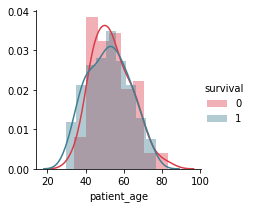

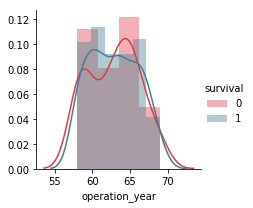

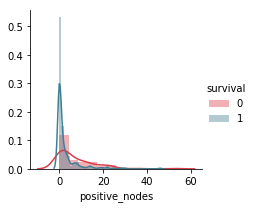

In [60]:
# Create density plots for each feature.
# Distplot doesn't support the hue argument; FacetGrid is a workaround.
for feature in features:
    fg = sns.FacetGrid(df, hue='survival')
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

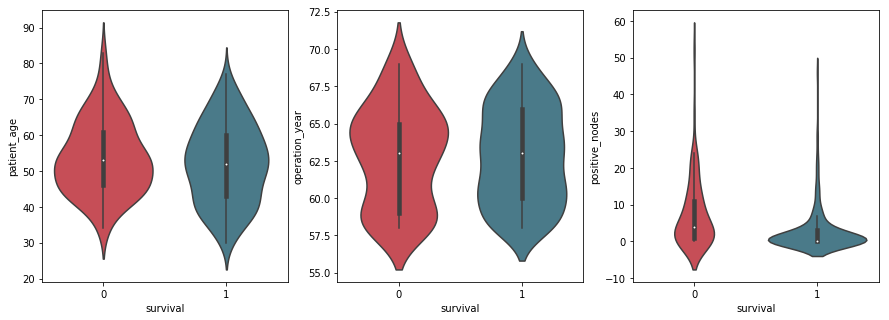

In [61]:
# Create violin plots for each feature.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for index, feature in enumerate(features):
    sns.violinplot(x = 'survival', y = feature, data = df, ax=axes[index])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


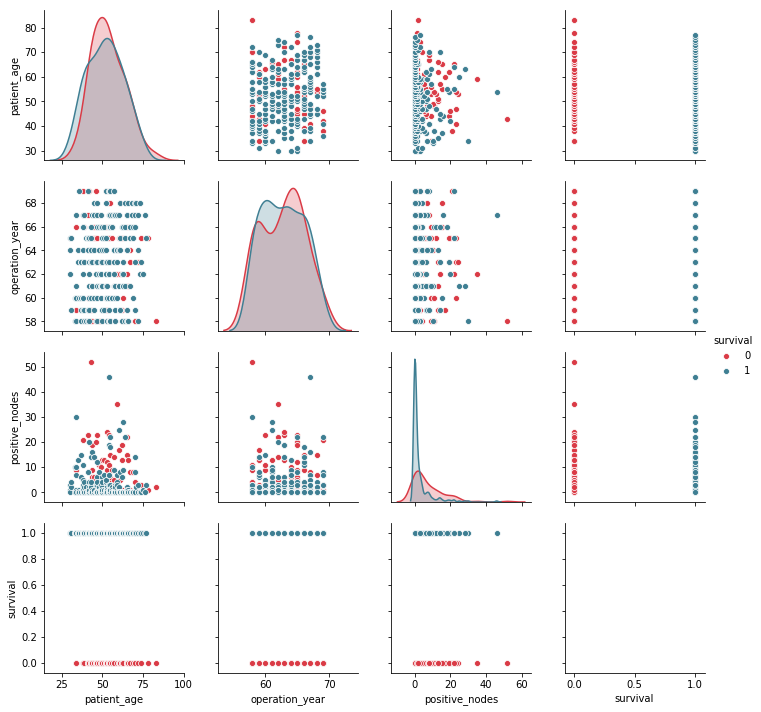

In [62]:
# Display pair plot.
sns.pairplot(df, hue = 'survival')
plt.show()

In [63]:
# Check correlation between variables.
corr_vals = df.corr()
corr_vals

,patient_age,operation_year,positive_nodes,survival
patient_age,1.000000,0.089529,-0.063176,-0.067950
operation_year,0.089529,1.000000,-0.003764,0.004768
positive_nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


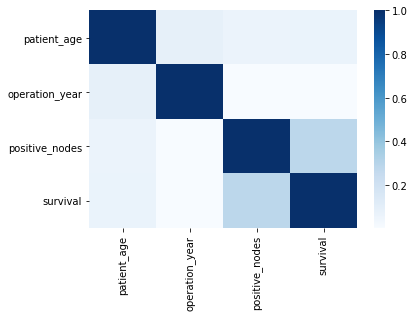

In [64]:
# Display the absolute value of the above correlation matrix as a heatmap.
sns.heatmap(abs(df.corr()), cmap = 'Blues');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###What is at least one feature that looks to have a positive relationship with survival?

The **year of operation** appears to have a negligible positive relationship with survival, with a correlation coefficient of** 0.005**, something which may well be due to chance alone.

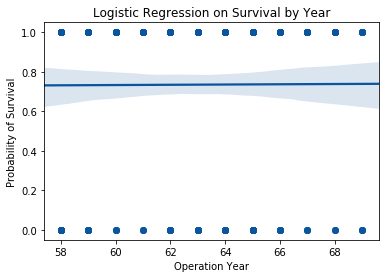

In [65]:
# Plot logistic regression on survival by operation year.
with sns.color_palette('Blues_r'):
  sns.regplot(x = 'operation_year', y = 'survival', data = df, logistic = True)
  plt.title('Logistic Regression on Survival by Year')
  plt.xlabel('Operation Year')
  plt.ylabel('Probability of Survival')
  plt.show()

In [66]:
# Calculate survival rates by operation year.
data_by_year = df.groupby('operation_year')
survival_by_year = data_by_year['survival'].agg(np.mean)
survival_by_year

operation_year
58    0.666667
59    0.666667
60    0.857143
61    0.884615
62    0.695652
63    0.733333
64    0.741935
65    0.535714
66    0.785714
67    0.840000
68    0.769231
69    0.636364
Name: survival, dtype: float64

In [67]:
# Calculate correlation coefficient between year of operation and survival rate.
np.corrcoef(survival_by_year.index, survival_by_year)

array([[ 1.        , -0.06184153],
       [-0.06184153,  1.        ]])

Aggregating the data by year, so that each year is weighted equally, regardless of the number of cases, reverses the apparent direction of the (admittedly trivial) correlation between operation year and survival odds, taking it from 0.005 to -0.062.

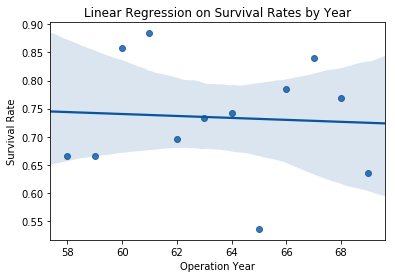

In [68]:
# Plot survival rates by operation year, with line of best fit.
with sns.color_palette('Blues_r'):
  sns.regplot(x = list(survival_by_year.index), y = survival_by_year)
  plt.title('Linear Regression on Survival Rates by Year')
  plt.xlabel('Operation Year')
  plt.ylabel('Survival Rate')
  plt.show()

In [69]:
# Show the number of cases in each survival category by year.
pd.crosstab(df['operation_year'], df['survival'])

survival,0,1
operation_year,,
58,12,24
59,9,18
60,4,24
61,3,23
62,7,16
63,8,22
64,8,23
65,13,15
66,6,22


Looking at the total number of cases per year, we can see the disparity underlying this effect.

###What is at least one feature that looks to have a negative relationship with survival?

The **number of positive axillary nodes detected** appears to have a negative relationship with survival, with a correlation coefficient of **-0.287**.

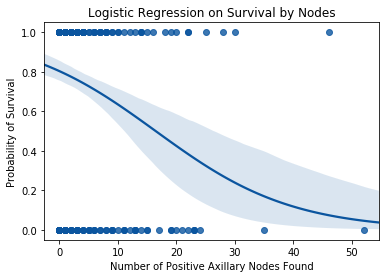

In [70]:
# Plot logistic regression on survival by number of positive nodes found.
with sns.color_palette('Blues_r'):
  sns.regplot(x = 'positive_nodes', y = 'survival', data = df, logistic = True)
  plt.title('Logistic Regression on Survival by Nodes')
  plt.xlabel('Number of Positive Axillary Nodes Found')
  plt.ylabel('Probability of Survival')
  plt.show()

**Patient age** also appears to have a trivial negative relationship with survival, with a correlation coefficient of **-0.068**.

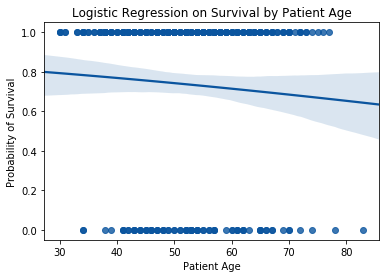

In [71]:
# Plot logistic regression on survival by patient age.
with sns.color_palette('Blues_r'):
  sns.regplot(x = 'patient_age', y = 'survival', data = df, logistic = True)
  plt.title('Logistic Regression on Survival by Patient Age')
  plt.xlabel('Patient Age')
  plt.ylabel('Probability of Survival')
  plt.show()

###How are those two features related with each other, and what might that mean?

The correlation coefficient between year of operation and number of positive nodes is also negligible, at -0.004. However, since it is negative, it suggests that patients in later years had slightly fewer positive axillary nodes found, implying they might have had a higher survival rate for that reason, rather than because of any advance in treatment.

In [72]:
# Calculate the average number of positive axillary nodes found by operation 
# year.
nodes_by_year = data_by_year['positive_nodes'].agg(np.mean)
nodes_by_year

operation_year
58    4.222222
59    4.037037
60    3.071429
61    4.461538
62    5.260870
63    4.700000
64    2.354839
65    5.000000
66    3.392857
67    4.080000
68    2.230769
69    6.181818
Name: positive_nodes, dtype: float64

In [73]:
# Calculate correlation coefficient between year of operation and mean number of 
# positive axillary nodes found.
np.corrcoef(nodes_by_year.index, nodes_by_year)

array([[1.        , 0.04184067],
       [0.04184067, 1.        ]])

As with survival rates, aggregating the data by year (so that each year is weighted equally, regardless of the number of cases), reverses the apparent direction of the tiny correlation between operation year and number of positive axillary nodes found, from -0.004 to 0.042.

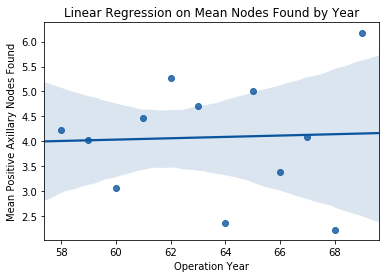

In [74]:
# Plot the mean number of positive axillary nodes found by operation year, with 
# line of best fit.
with sns.color_palette('Blues_r'):
  sns.regplot(x = list(nodes_by_year.index), y = nodes_by_year)
  plt.title('Linear Regression on Mean Nodes Found by Year')
  plt.xlabel('Operation Year')
  plt.ylabel('Mean Positive Axillary Nodes Found')
  plt.show()

In [75]:
# Show the number of cases with varying ranges of positive nodes found by year.
df['node_bin'] = pd.cut(df['positive_nodes'], bins = [0, 5, 10, 20, 40, 60], include_lowest = True)
pd.crosstab(df['operation_year'], df['node_bin'].astype(str))

node_bin,"(-0.001, 5.0]","(10.0, 20.0]","(20.0, 40.0]","(40.0, 60.0]","(5.0, 10.0]"
operation_year,,,,,
58,30,2,1,1,2
59,19,4,0,0,4
60,24,2,1,0,1
61,19,1,2,0,4
62,18,2,2,0,1
63,22,4,2,0,2
64,24,1,0,0,6
65,20,3,2,0,3
66,22,5,0,0,1


And again, as with survival rates, it is the differing number of cases recorded from one year to the next, in combination with the small scale of the apparent effect that makes this reversal of correlation possible.